In [53]:
# Cell 1: Generate a random sample from U(0,1) and transform to Exponential
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [54]:
# a. Generate a random sample of 25,000 values from a U(0,1)
uniform_sample1 = np.random.uniform(0, 1, 25000)

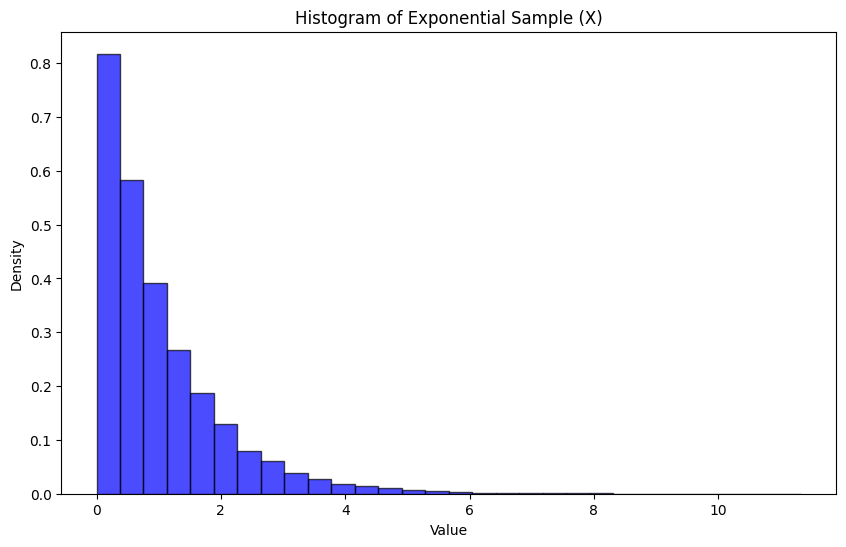

It looks roughly like a triangle! The surface of the triangle is 3*0.7/2=1.05! So yes! With a quick test the surface is about 1!


In [55]:
# b. Transform the sample through the inverse CDF (quantile function) of an Exponential distribution
lambda_param = 1
exp_sample = expon.ppf(uniform_sample1, scale=1/lambda_param)

# Cell 2: Plot histogram of the Exponential sample
plt.figure(figsize=(10, 6))
plt.hist(exp_sample, bins=30, density=True, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Exponential Sample (X)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
# c. Comment on whether the area under the curve integrates to 1 (it should by the definition of 'density')
print('It looks roughly like a triangle! The surface of the triangle is 3*0.7/2=1.05! So yes! With a quick test the surface is about 1!')

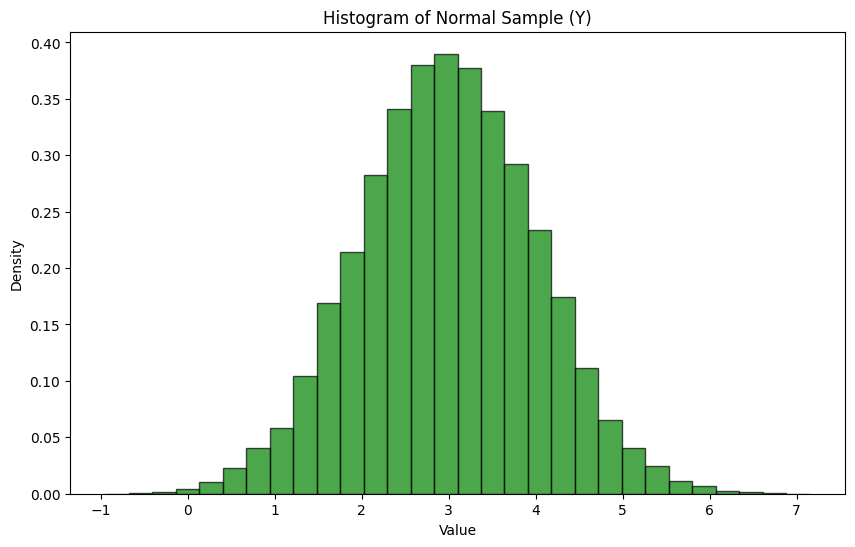

It looks roughly like a triangle again! The surface of the triangle is 5*0.4/2=1! So yes! With a quick test the surface is about 1!


In [56]:
# Cell 3: Generate a random sample from U(0,1) and transform to Normal
# a. Generate a random sample of 25,000 values from a U(0,1)
uniform_sample2 = np.random.uniform(0, 1, 25000)

# b. Transform the sample through the inverse CDF of a Normal distribution
mean = 3
variance = 1
std_dev = np.sqrt(variance)
normal_sample = norm.ppf(uniform_sample2, loc=mean, scale=std_dev)

# Cell 4: Plot histogram of the Normal sample
plt.figure(figsize=(10, 6))
plt.hist(normal_sample, bins=30, density=True, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Normal Sample (Y)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
# c. Again, comment on the area under the curve
print('It looks roughly like a triangle again! The surface of the triangle is 5*0.4/2=1! So yes! With a quick test the surface is about 1!')

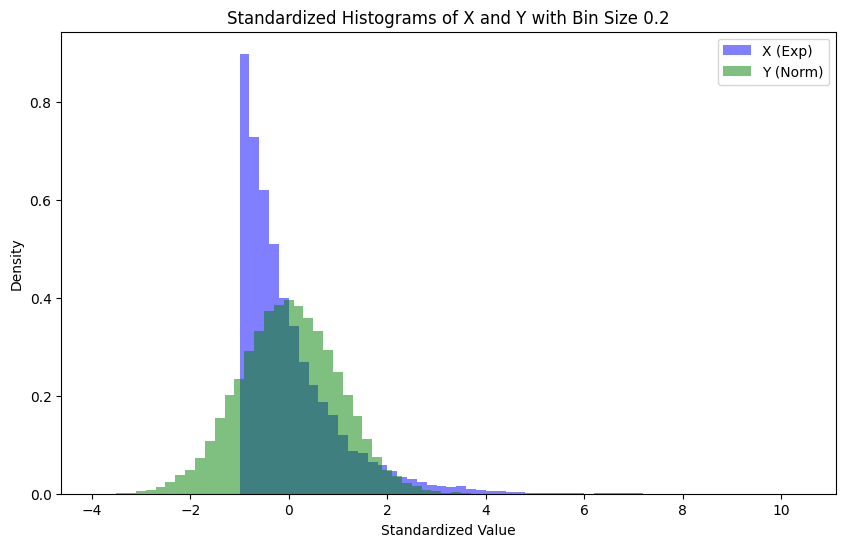

Both distributions are centered around zero! Indeed: this should be expected! Since we have standardized both samples X and Y, they both now have a zero mean value and st. deviation equal to 1!


In [57]:
# Cell 5: Standardize both samples and plot histograms with bin size 0.2
# e. Standardize the samples
X_standardized = (exp_sample - np.mean(exp_sample)) / np.std(exp_sample)
Y_standardized = (normal_sample - np.mean(normal_sample)) / np.std(normal_sample)

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(X_standardized, bins=np.arange(min(X_standardized), max(X_standardized) + 0.2, 0.2), density=True, color='blue', alpha=0.5, label='X (Exp)')
plt.hist(Y_standardized, bins=np.arange(min(Y_standardized), max(Y_standardized) + 0.2, 0.2), density=True, color='green', alpha=0.5, label='Y (Norm)')
plt.title('Standardized Histograms of X and Y with Bin Size 0.2')
plt.xlabel('Standardized Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Observation
print('Both distributions are centered around zero! Indeed: this should be expected! Since we have standardized both samples X and Y, they both now have a zero mean value and st. deviation equal to 1!')

In [58]:
# Cell 6: Calculate empirical probabilities and assess independence
# f. Calculate P[X > 1*sigma] and P[Y > 1*sigma]
X_sigma = np.std(exp_sample)
Y_sigma = np.std(normal_sample)

P_X_greater_05sigma = np.mean(X_standardized > 0.5)
P_Y_greater_05sigma = np.mean(Y_standardized > 0.5)

# Empirical probability of the intersection P[X>1*sigma AND Y>1*sigma]
P_intersection = np.mean((X_standardized > 0.5) & (Y_standardized > 0.5))

print(f"P[X > 0.5*sigma]: {P_X_greater_05sigma}")
print(f"P[Y > 0.5*sigma]: {P_Y_greater_05sigma}")
print(f"P[X > 0.5*sigma AND Y > 0.5*sigma]: {P_intersection}")

# Comment on independence
print('It seems that the probability of the intercection is roughly equal to the product of the marginal probabilities, so YES X AND Y ARE INDEPENDENT! Note: this is expected, since we have created these samples using seperate uniform samples.')

P[X > 0.5*sigma]: 0.22276
P[Y > 0.5*sigma]: 0.31044
P[X > 0.5*sigma AND Y > 0.5*sigma]: 0.07076
It seems that the probability of the intercection is roughly equal to the product of the marginal probabilities, so YES X AND Y ARE INDEPENDENT! Note: this is expected, since we have created these samples using seperate uniform samples.


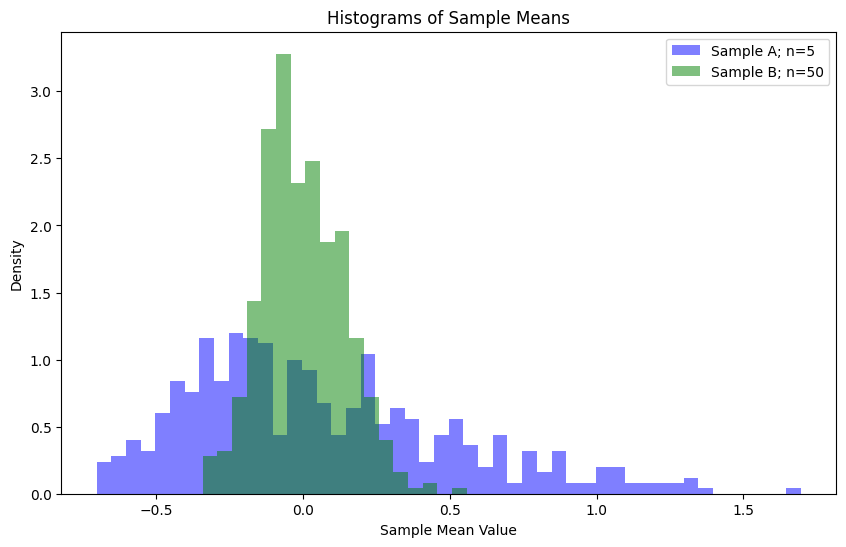

The distribution that corresponds to n=50 looks more Gaussian. Because n=5 is small for the CLT to be applicable! Also, for n=50, the distribution is norrower. Thus, there is smaller uncertainty in the estimation of the mean value! Both samples are centered around zero.


In [59]:
# Cell 7: Central Limit Theorem

# g. Sample n=5 random values from X and get their mean value.
# Repeat this process 500 times.
n = 5
num_repeats = 500
sample_meansA = [np.mean(np.random.choice(X_standardized, n)) for _ in range(num_repeats)]

# h. Sample n=50 random values from X and get their mean value.
# Repeat this process 500 times.
n = 50
num_repeats = 500
sample_meansB = [np.mean(np.random.choice(X_standardized, n)) for _ in range(num_repeats)]

# Plot the histograms of the sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_meansA, bins=np.arange(min(sample_meansA), max(sample_meansA) + 0.05, 0.05), density=True, color='blue', alpha=0.5, label='Sample A; n=5')
plt.hist(sample_meansB, bins=np.arange(min(sample_meansB), max(sample_meansB) + 0.05, 0.05), density=True, color='green', alpha=0.5, label='Sample B; n=50')
plt.title('Histograms of Sample Means')
plt.xlabel('Sample Mean Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Comment
print('The distribution that corresponds to n=50 looks more Gaussian. Because n=5 is small for the CLT to be applicable! Also, for n=50, the distribution is norrower. Thus, there is smaller uncertainty in the estimation of the mean value! Both samples are centered around zero.')


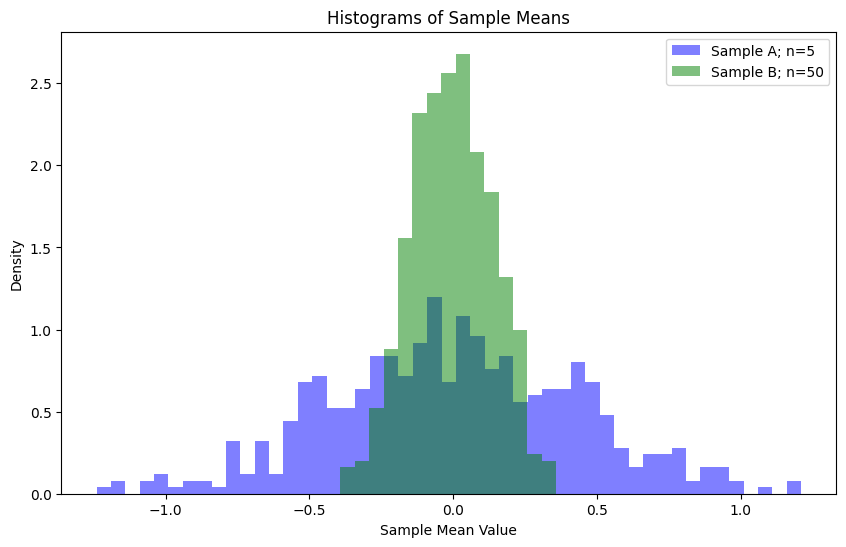

Both distributions look Gaussian. Here, although n=5 is small, it does not matter because the parent distribution is Gaussian already! Again, for n=50 the distribution is norrower.


In [60]:
# Cell 8: Central Limit Theorem: repeat for Y

# g. Sample n=5 random values from Y and get their mean value.
# Repeat this process 500 times.
n = 5
num_repeats = 500
sample_meansA = [np.mean(np.random.choice(Y_standardized, n)) for _ in range(num_repeats)]

# h. Sample n=50 random values from Y and get their mean value.
# Repeat this process 500 times.
n = 50
num_repeats = 500
sample_meansB = [np.mean(np.random.choice(Y_standardized, n)) for _ in range(num_repeats)]

# Plot the histograms of the sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_meansA, bins=np.arange(min(sample_meansA), max(sample_meansA) + 0.05, 0.05), density=True, color='blue', alpha=0.5, label='Sample A; n=5')
plt.hist(sample_meansB, bins=np.arange(min(sample_meansB), max(sample_meansB) + 0.05, 0.05), density=True, color='green', alpha=0.5, label='Sample B; n=50')
plt.title('Histograms of Sample Means')
plt.xlabel('Sample Mean Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Comment
print('Both distributions look Gaussian. Here, although n=5 is small, it does not matter because the parent distribution is Gaussian already! Again, for n=50 the distribution is norrower.')
